# Introduction

In this project, we will work with data from the **S&P500** Index. The S&P500 is a stock market index. 

Some companies are publicly traded, which means that anyone can buy and sell their shares on the open market. A share entitles the owner to some control over the direction of the company and to a percentage (or share) of the earnings of the company. When you buy or sell shares, it's common known as **trading a stock**.

**The price of a share is based on supply and demand** for a given stock. For example, Apple stock has a price of 120 dollars per share as of December 2015 -- http://www.nasdaq.com/symbol/aapl. A stock that is in less demand, like Ford Motor Company, has a lower price -- http://finance.yahoo.com/q?s=F. Stock price is also influenced by other factors, including the number of shares a company has issued.

Stocks are traded daily and the price can rise or fall from the beginning of a trading day to the end based on demand. Stocks that are in more in demand, such as Apple, are traded more often than stocks of smaller companies.

Indexes aggregate the prices of multiple stocks together, and allow you to see how the market as a whole performs. For example, the Dow Jones Industrial Average aggregates the stock prices of 30 large American companies together. The S&P500 Index aggregates the stock prices of 500 large companies. When an index fund goes up or down, you can say that the primary market or sector it represents is doing the same. For example, if the Dow Jones Industrial Average price goes down one day, you can say that American stocks overall went down (ie, most American stocks went down in price).

We will be using **historical data** on the price of the **S&P500** Index to make **predictions** about **future prices**. Predicting whether an index goes up or down helps forecast how the stock market as a whole performs. Since stocks tend to correlate with how well the economy as a whole is performs, it can also help with economic forecasts.

# Dataset overview

Each row in the file contains a **daily record** of the price of the **S&P500 Index from 1950 to 2015**. 

<ul>
    <li><b>Date --</b> The date of the record.</li>
    <li><b>Open --</b> The opening price of the day (when trading starts).</li>
    <li><b>High --</b> The highest trade price during the day.</li>
    <li><b>Low --</b> The lowest trade price during the day.</li>
    <li><b>Close --</b> The closing price for the day (when trading is finished).</li>
    <li><b>Volume --</b> The number of shares traded.</li>
    <li><b>Adj Close --</b> The daily closing price, adjusted retroactively to include any corporate actions.</li>
</ul>

# Results Summary

First, after doing an exploratory analysis different **indicators/features** were created from the initial dataset.

Second, the correlation between all the columns and the target was computed, a threshold of **0.85** was established discarding all the columns low correlated to the target feature. Then, all the columns correlations were computed in section **6.1.6** seeing all the high correlated columns, some columns that may contain duplicate information were discarded. 

The first implemented strategy used the original dataset containing the daily record of the price **S&P500** Index from **1950** to **2015**, split it into train and test sets being the test set all the records from **2013** until **2016**. And the following regressions algorithms were applied, using the **RMSE** as a metric.

<ul>
<li><b>Logistic Regression -- </b> RMSE=22.24</li>
<li><b>Elastic Net -- </b>  RMSE=22.22</li>
<li><b>Random Forest Regressor -- </b> RMSE=401.36</li>
</ul>

After overviewing the results, to achieve a lower RMSE, a new strategy for each model was applied, instead of using an established proportion between the train and test datasets, we implemented different models predicting just one day ahead starting from **2013** until **2016** in a more realistic way. The obtained results are as follows:

<ul>
<li><b>Logistic Regression -- </b> RMSE=16.17</li>
<li><b>Elastic Net -- </b>  RMSE=16.15</li>
<li><b>Random Forest Regressor -- </b> RMSE=14.24</li>
</ul>

The lowest **RMSE=14.24** was obtained by using the Random Forest Regressor algorithm, we conclude that this improvement was caused by the increase of data in the training set. In further steps with aim of improving these results, additional features will be included as well as more registers, not only the daily price record.



# Requirements

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# Functions

In [2]:
def print_rmse_message(rmse):
    print("RMSE: ", round(rmse, 2))
    
def split_by_date(df, date_column, date):
    train = df[df[date_column] < date]
    test = df[df[date_column] >= date]
    
    return train, test

def find_extrem_prices(row, df, type_='max'):
    year = row['year_of_date']
    if year != df['year_of_date'].min():
        if type_=='max':
            return df[df['year_of_date']==year-1]["Close"].max()        
        else:
            return df[df['year_of_date']==year-1]["Close"].min()    
    else: 
        return 0
    
def get_linear_regression_error(train, test, features, target):
    
    lr_model = LinearRegression()
    
    #Train
    lr_model.fit(train[features], train[target])
    
    #Test
    predictions = lr_model.predict(test[features])
    
    print("Score: ", round(lr_model.score(test[features], test[target]), 2))
    
    #Error
    mse = mean_squared_error(test[target], predictions)
    rmse = np.sqrt(mse)
    return rmse, predictions

def create_line_plot(x, y, y2, rmse, algorithm_title=''):
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20, 10))
    ax = sns.lineplot(y=y, x=x, label="Real Value")
    ax2 = sns.lineplot(y=y2, x=x, label="Prediction RMSE="+str(round(rmse, 2)))
    
    ax.set_ylabel("Close") 
    ax.set_xlabel("Date", fontsize = "large")
    ax.set_title("Predictions vs Real Value" + algorithm_title, fontsize = "x-large")

    plt.show()  
    
def get_elastic_net_error(train, test, features, target, max_iter=1000):
    
    en_model = ElasticNet(random_state=0, max_iter=max_iter)
    
    #Train
    en_model.fit(train[features], train[target])
    
    #Test
    predictions = en_model.predict(test[features])
    
    print("Score: ", round(en_model.score(test[features], test[target]), 2))
    
    #Error
    mse = mean_squared_error(test[target], predictions)
    rmse = np.sqrt(mse)
    return rmse, predictions

def get_random_forest_regressor_error(train, test, features, target, max_iter=1000):
    
    rf_model = RandomForestRegressor(random_state=0)
    
    #Train
    rf_model.fit(train[features], train[target])
    
    #Test
    predictions = rf_model.predict(test[features])
    
    print("Score: ", round(rf_model.score(test[features], test[target]), 2))
    
    #Error
    mse = mean_squared_error(test[target], predictions)
    rmse = np.sqrt(mse)
    return rmse, predictions

def create_indicator(df, column, indicator, days, function):
    # Makes a series of Close price with the dates as indexes
    s = pd.Series(np.array(df[column]), index=np.array(df["Date"]))
    
    # Calculates the mean price of past days
    means = s.rolling(window = days).apply(np.mean)
        
    # Shift indices to exclude the price of each day from the mean value
    means = means.shift()
    
    # Converts indices to Date
    means = means.reset_index()
    means = means.rename(columns={'index':'Date', 0:indicator})
    
    df_new = df.merge(means, left_on="Date", right_on="Date")
    return df_new

# Data Overview

In [3]:
df = pd.read_csv('sphist.csv', low_memory=False)

In [4]:
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883
...,...,...,...,...,...,...,...
16585,1950-01-09,17.080000,17.080000,17.080000,17.080000,2.520000e+06,17.080000
16586,1950-01-06,16.980000,16.980000,16.980000,16.980000,2.010000e+06,16.980000
16587,1950-01-05,16.930000,16.930000,16.930000,16.930000,2.550000e+06,16.930000
16588,1950-01-04,16.850000,16.850000,16.850000,16.850000,1.890000e+06,16.850000


In [5]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,16590.000000,16590.000000,16590.000000,16590.000000,1.659000e+04,16590.000000
mean,482.570941,485.624237,479.367501,482.692491,7.940099e+08,482.692491
std,554.889186,558.186049,551.367625,555.007904,1.456582e+09,555.007904
min,16.660000,16.660000,16.660000,16.660000,6.800000e+05,16.660000
25%,83.860001,84.594997,83.139997,83.860001,7.610000e+06,83.860001
50%,144.049995,145.294998,143.105004,144.264999,7.170500e+07,144.264999
75%,950.722488,956.665024,941.969986,950.797500,7.866750e+08,950.797500
max,2130.360107,2134.719971,2126.060059,2130.820068,1.145623e+10,2130.820068


In [6]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

As we can see all columns match the previous description being numeric.

In [7]:
df.Date = pd.to_datetime(df.Date)

In [8]:
df = df.sort_values(by='Date', ascending=True)

In [9]:
df

,Date,Open,High,Low,Close,Volume,Adj Close
16589,1950-01-03,16.660000,16.660000,16.660000,16.660000,1.260000e+06,16.660000
16588,1950-01-04,16.850000,16.850000,16.850000,16.850000,1.890000e+06,16.850000
16587,1950-01-05,16.930000,16.930000,16.930000,16.930000,2.550000e+06,16.930000
16586,1950-01-06,16.980000,16.980000,16.980000,16.980000,2.010000e+06,16.980000
16585,1950-01-09,17.080000,17.080000,17.080000,17.080000,2.520000e+06,17.080000
...,...,...,...,...,...,...,...
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941


## Generating indicators

In this section the following indicators will be created:
    
1. The average volume over the past five days. 

2. The average volume over the past year. 

3. The ratio between the average volume for the past five days, and the average volume for the past year. 

4. The standard deviation of the average volume over the past five days. 

5. The standard deviation of the average volume over the past year.

6. The ratio between the standard deviation of the average volume for the past five days, and the standard deviation of the average volume for the past year. 

7. The year component of the date. 

8. The ratio between the lowest price in the past year and the current price.

9. The ratio between the highest price in the past year and the current price.

10. The month component of the date. 

11. The day of week. 

12. The day component of the date. 

13. The number of holidays in the prior month.

### Close value last days averages

<ul>
<li>The average price from the past 5 days.</li>
<li>The average price for the past 30 days.</li>
<li>The average price for the past 365 days.</li>
</ul>

In [10]:
df = create_indicator(df, 'Close', 'last_5_days_mean', 5, np.mean)
df = create_indicator(df, 'Close', 'last_30_days_mean', 30, np.mean)
df = create_indicator(df, 'Close', 'last_365_days_mean', 365, np.mean)

In [11]:
df

,Date,Open,High,Low,Close,Volume,Adj Close,last_5_days_mean,last_30_days_mean,last_365_days_mean
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,1.260000e+06,16.660000,NaN,NaN,NaN
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,1.890000e+06,16.850000,NaN,NaN,NaN
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,2.550000e+06,16.930000,NaN,NaN,NaN
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,2.010000e+06,16.980000,NaN,NaN,NaN
4,1950-01-09,17.080000,17.080000,17.080000,17.080000,2.520000e+06,17.080000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
16585,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883,2087.024023,2073.984998,2035.531178
16586,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010,2090.231982,2076.283993,2035.914082
16587,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117,2088.306006,2077.908659,2036.234356
16588,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941,2080.456006,2078.931331,2036.507343


Check days with missing data are not computed

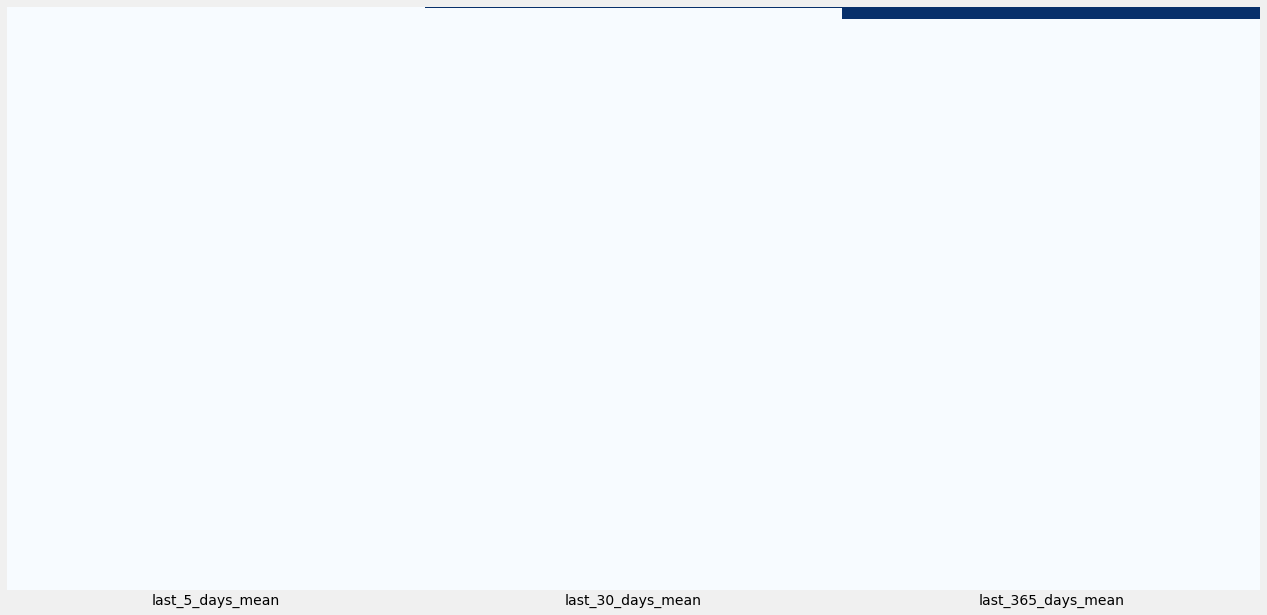

In [12]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 10))
sns.heatmap(df[["last_5_days_mean", 
               "last_30_days_mean", 
               "last_365_days_mean"]].isnull(), cbar=False, yticklabels=False, cmap="Blues")
plt.show()

As we can see the maximum number of missing averages on days is for the last 365 days mean indicator and minimum for the last 5.

All the rows befrore **1951-01-03** will be removed.

In [13]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Close                   0
Volume                  0
Adj Close               0
last_5_days_mean        5
last_30_days_mean      30
last_365_days_mean    365
dtype: int64

### Volume value last days averages

<ul>
<li>The average volume over the past 5 days..</li>
<li>The average volume over the past 30 days.</li>
<li>The average volume over the past 365 days.</li>
</ul>

In [14]:
df = create_indicator(df, 'Volume', 'last_5_days_volume_mean', 5, np.mean)
df = create_indicator(df, 'Volume', 'last_30_days_volume_mean', 30, np.mean)
df = create_indicator(df, 'Volume', 'last_365_days_volume_mean', 365, np.mean)

In [15]:
df.isnull().sum()

Date                           0
Open                           0
High                           0
Low                            0
Close                          0
Volume                         0
Adj Close                      0
last_5_days_mean               5
last_30_days_mean             30
last_365_days_mean           365
last_5_days_volume_mean        5
last_30_days_volume_mean      30
last_365_days_volume_mean    365
dtype: int64

### Date data engineering

From the date column the following values will be extracted:
<ul>
    <li>Day</li>
    <li>Month</li>
    <li>Year</li>
    <li>Day of week</li>
    <li>Day of year</li>
    <li>Quarter</li>    
</ul>

In [16]:
df["day_of_date"] = df["Date"].dt.day
df["month_of_date"] = df["Date"].dt.month
df["year_of_date"] = df["Date"].dt.year
df["day_of_week"] = df["Date"].dt.dayofweek
df["day_of_year"] = df["Date"].dt.dayofyear
df["quarter_of_year"] = df["Date"].dt.quarter

In [17]:
df

,Date,Open,High,Low,Close,Volume,Adj Close,last_5_days_mean,last_30_days_mean,last_365_days_mean,last_5_days_volume_mean,last_30_days_volume_mean,last_365_days_volume_mean,day_of_date,month_of_date,year_of_date,day_of_week,day_of_year,quarter_of_year
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,1.260000e+06,16.660000,NaN,NaN,NaN,NaN,NaN,NaN,3,1,1950,1,3,1
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,1.890000e+06,16.850000,NaN,NaN,NaN,NaN,NaN,NaN,4,1,1950,2,4,1
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,2.550000e+06,16.930000,NaN,NaN,NaN,NaN,NaN,NaN,5,1,1950,3,5,1
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,2.010000e+06,16.980000,NaN,NaN,NaN,NaN,NaN,NaN,6,1,1950,4,6,1
4,1950-01-09,17.080000,17.080000,17.080000,17.080000,2.520000e+06,17.080000,NaN,NaN,NaN,NaN,NaN,NaN,9,1,1950,0,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16585,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883,2087.024023,2073.984998,2035.531178,3.207544e+09,3.842181e+09,3.527800e+09,1,12,2015,1,335,4
16586,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010,2090.231982,2076.283993,2035.914082,3.232372e+09,3.856341e+09,3.526090e+09,2,12,2015,2,336,4
16587,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117,2088.306006,2077.908659,2036.234356,3.245514e+09,3.876979e+09,3.529468e+09,3,12,2015,3,337,4
16588,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941,2080.456006,2078.931331,2036.507343,3.536224e+09,3.899603e+09,3.532802e+09,4,12,2015,4,338,4


### Ratios

The ratio between the average price for the past 5 days, and the average price for the past 365 days.

In [18]:
df['ratio_5365_average_close'] = df['last_5_days_mean'] / df['last_365_days_mean']

The ratio between the standard deviation for the past 5 days, and the standard deviation for the past 365 days.

In [19]:
df = create_indicator(df, 'Close', 'std_close_5', 5, np.std)
df = create_indicator(df, 'Close', 'std_close_365', 365, np.std)

In [20]:
df['ratio_5365_std_close'] = df['std_close_5'] / df['std_close_365']

The standard deviation of the average volume over the past five days.

The standard deviation of the average volume over the past year.

In [21]:
df = create_indicator(df, 'last_5_days_volume_mean', 'std_volume_5', 5, np.std)
df = create_indicator(df, 'last_365_days_volume_mean', 'std_volume_365', 365, np.std)

The ratio between the lowest price in the past year and the current price.

The ratio between the highest price in the past year and the current price.

In [22]:
df["past_year_highest_price"] = df.apply(lambda x: find_extrem_prices(x, df), axis=1)
df["past_year_lowest_price"] = df.apply(lambda x: find_extrem_prices(x, df, type_='min'), axis=1)

In [23]:
df['min_price_ratio'] = df["past_year_lowest_price"] / df["Close"] 
df['max_price_ratio'] = df["past_year_highest_price"] / df["Close"] 

In [24]:
df

,Date,Open,High,Low,Close,Volume,Adj Close,last_5_days_mean,last_30_days_mean,last_365_days_mean,...,ratio_5365_average_close,std_close_5,std_close_365,ratio_5365_std_close,std_volume_5,std_volume_365,past_year_highest_price,past_year_lowest_price,min_price_ratio,max_price_ratio
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,1.260000e+06,16.660000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,1.890000e+06,16.850000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,2.550000e+06,16.930000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,2.010000e+06,16.980000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
4,1950-01-09,17.080000,17.080000,17.080000,17.080000,2.520000e+06,17.080000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16585,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883,2087.024023,2073.984998,2035.531178,...,1.025297,2087.024023,2035.531178,1.025297,3.668599e+09,3.357565e+09,2090.570068,1741.890015,0.828434,0.994264
16586,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010,2090.231982,2076.283993,2035.914082,...,1.026680,2090.231982,2035.914082,1.026680,3.524000e+09,3.358041e+09,2090.570068,1741.890015,0.837644,1.005319
16587,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117,2088.306006,2077.908659,2036.234356,...,1.025573,2088.306006,2036.234356,1.025573,3.390498e+09,3.358506e+09,2090.570068,1741.890015,0.849860,1.019979
16588,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941,2080.456006,2078.931331,2036.507343,...,1.021580,2080.456006,2036.507343,1.021580,3.281320e+09,3.358987e+09,2090.570068,1741.890015,0.832767,0.999465


Now all the auxiliar variables created will be removed:

In [25]:
df.drop(columns=["min_price_ratio", "max_price_ratio"], inplace=True)

### Number of holidays in the prior month.

In [26]:
df["start_month"] = (df["Date"] - pd.to_timedelta(30, unit='d')).dt.strftime('%Y-%m')
df["end_month"] = df['Date'].dt.strftime('%Y-%m')
df["days_in_interval"] = (pd.to_datetime(df["end_month"]) - pd.to_datetime(df["start_month"]))

In [27]:
df["holidays_in_prior_month"] = df["days_in_interval"].dt.days - np.busday_count(df["start_month"], df["end_month"])

As we can see the number of holidays in prior months are as follows:

In [28]:
df.holidays_in_prior_month.value_counts(dropna=False)

8     8267
9     4378
10    3547
0      316
18      34
17      25
16      23
Name: holidays_in_prior_month, dtype: int64

Now we will remove all the auxiliar variables created:

In [29]:
df.drop(columns=["start_month", "end_month", "days_in_interval", "holidays_in_prior_month"], inplace=True)

In [30]:
df

,Date,Open,High,Low,Close,Volume,Adj Close,last_5_days_mean,last_30_days_mean,last_365_days_mean,...,day_of_year,quarter_of_year,ratio_5365_average_close,std_close_5,std_close_365,ratio_5365_std_close,std_volume_5,std_volume_365,past_year_highest_price,past_year_lowest_price
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,1.260000e+06,16.660000,NaN,NaN,NaN,...,3,1,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,1.890000e+06,16.850000,NaN,NaN,NaN,...,4,1,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,2.550000e+06,16.930000,NaN,NaN,NaN,...,5,1,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,2.010000e+06,16.980000,NaN,NaN,NaN,...,6,1,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
4,1950-01-09,17.080000,17.080000,17.080000,17.080000,2.520000e+06,17.080000,NaN,NaN,NaN,...,9,1,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16585,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883,2087.024023,2073.984998,2035.531178,...,335,4,1.025297,2087.024023,2035.531178,1.025297,3.668599e+09,3.357565e+09,2090.570068,1741.890015
16586,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010,2090.231982,2076.283993,2035.914082,...,336,4,1.026680,2090.231982,2035.914082,1.026680,3.524000e+09,3.358041e+09,2090.570068,1741.890015
16587,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117,2088.306006,2077.908659,2036.234356,...,337,4,1.025573,2088.306006,2036.234356,1.025573,3.390498e+09,3.358506e+09,2090.570068,1741.890015
16588,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941,2080.456006,2078.931331,2036.507343,...,338,4,1.021580,2080.456006,2036.507343,1.021580,3.281320e+09,3.358987e+09,2090.570068,1741.890015


Now all the rows with null values will be removed.

In [31]:
df_updated = df[df["Date"] > datetime(year=1951, month=1, day=2)]
df_updated = df_updated.dropna(axis=0)

In [32]:
df_updated.isnull().sum()

Date                         0
Open                         0
High                         0
Low                          0
Close                        0
Volume                       0
Adj Close                    0
last_5_days_mean             0
last_30_days_mean            0
last_365_days_mean           0
last_5_days_volume_mean      0
last_30_days_volume_mean     0
last_365_days_volume_mean    0
day_of_date                  0
month_of_date                0
year_of_date                 0
day_of_week                  0
day_of_year                  0
quarter_of_year              0
ratio_5365_average_close     0
std_close_5                  0
std_close_365                0
ratio_5365_std_close         0
std_volume_5                 0
std_volume_365               0
past_year_highest_price      0
past_year_lowest_price       0
dtype: int64

### Correlations

In this section will see how the created indicators are correlated to the target column also a correlation **threshold** will be established to removed low correlated columns.

Finally, we will search for strong correlated columns as they are only containing duplicated information.

In [33]:
target_correlations = df_updated[['Close','last_5_days_mean',
 'last_30_days_mean',
 'last_365_days_mean',
 'last_5_days_volume_mean',
 'last_30_days_volume_mean',
 'last_365_days_volume_mean',
 'day_of_date',
 'month_of_date',
 'year_of_date',
 'day_of_week',
 'day_of_year',
 'quarter_of_year',
 'ratio_5365_average_close',
 'std_close_5',
 'std_close_365',
 'ratio_5365_std_close',
 'past_year_highest_price',
 'past_year_lowest_price']].corr()["Close"]

In [34]:
target_correlations

Close                        1.000000
last_5_days_mean             0.999790
last_30_days_mean            0.999176
last_365_days_mean           0.988685
last_5_days_volume_mean      0.779243
last_30_days_volume_mean     0.785287
last_365_days_volume_mean    0.783314
day_of_date                 -0.000840
month_of_date                0.009619
year_of_date                 0.875674
day_of_week                  0.003296
day_of_year                  0.009412
quarter_of_year              0.009848
ratio_5365_average_close     0.054583
std_close_5                  0.999790
std_close_365                0.988685
ratio_5365_std_close         0.054583
past_year_highest_price      0.979012
past_year_lowest_price       0.979944
Name: Close, dtype: float64

In [35]:
target_correlations.values.mean()

0.5946894524046136

In [36]:
target_correlations.values.min()

-0.0008403979053792505

We will use a **threshold of 0.85** to keep only the columns that are strong correlated to the target column.

In [37]:
keeping_columns = target_correlations[target_correlations.values>0.85].index.tolist()

From the strong correlated columns to the target column, let's check which ones are strong correlated, that indicated that we are working with duplicate informaton and should be removed

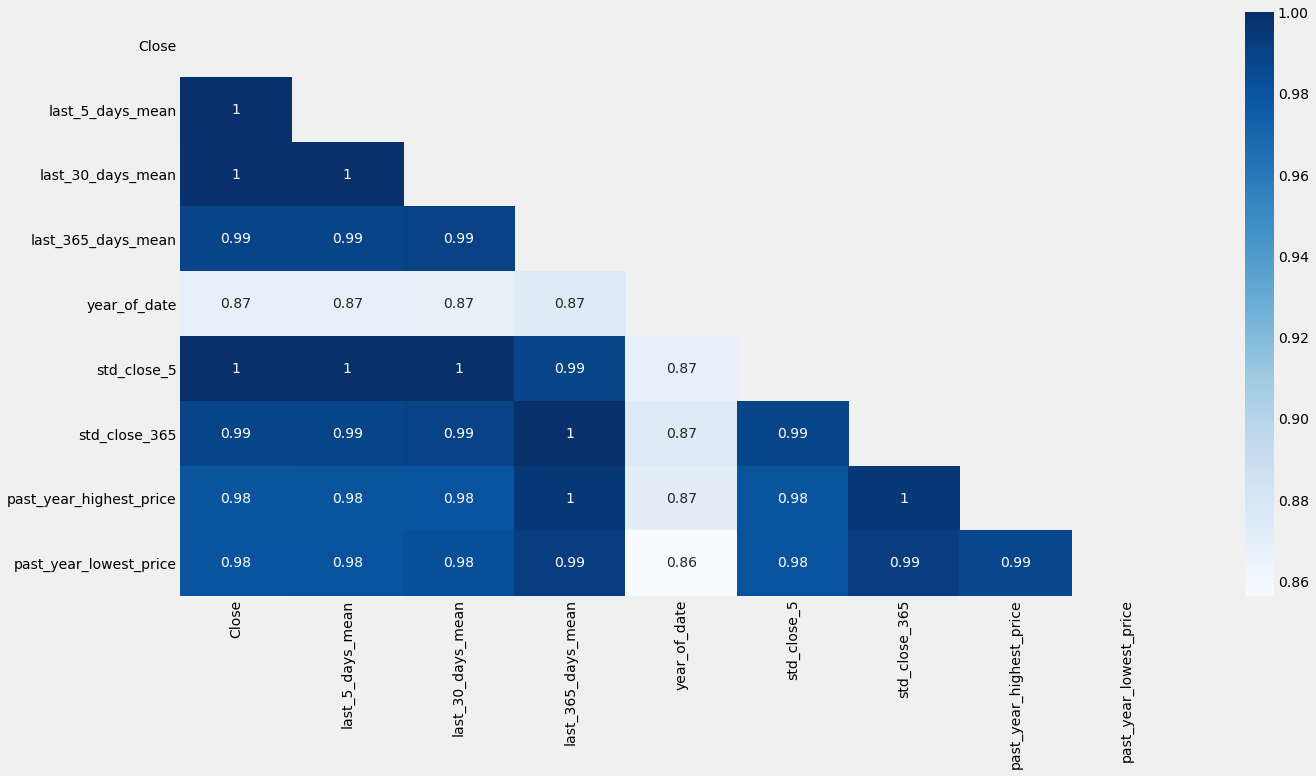

In [38]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 10))
mask = np.triu(df[keeping_columns].corr())
sns.heatmap(df[keeping_columns].corr(), mask=mask, annot=True, cmap="Blues")
plt.show()

From the previous chart we can conclude that **std_close_365** is high correlated with **last_365_days_mean** and with **past_year_highest_price**, so we will remove this columns as we consider that is duplicated information.

# Algorithm implementation

## Train test split

We are going to generate two new dataframes to use in making our algorithm.
<ul>
    <li><b>train --</b> should contain any rows in the data with a date less than 2013-01-01.</li>
    <li><b>test --</b>  should contain any rows with a date greater than or equal to 2013-01-01.</li>
</ul>

In [39]:
train, test = split_by_date(df_updated[["Date"] + keeping_columns], 
                            'Date', datetime(year=2013, month=1, day=1))

## Linear Regression

Then the **Linear Regression** model will be used to train the train dataset and predict the test dataset. The **root of mean squared error (RMSE)** is also calculated to represent the forecast error.

In [101]:
train.columns.tolist()

['Date',
 'Close',
 'last_5_days_mean',
 'last_30_days_mean',
 'last_365_days_mean',
 'year_of_date',
 'std_close_5',
 'std_close_365',
 'past_year_highest_price',
 'past_year_lowest_price']

First we will try with the first indicators created.

In [42]:
initial_indicators = ['last_5_days_mean', 'last_30_days_mean', 'last_365_days_mean']

Score:  0.99


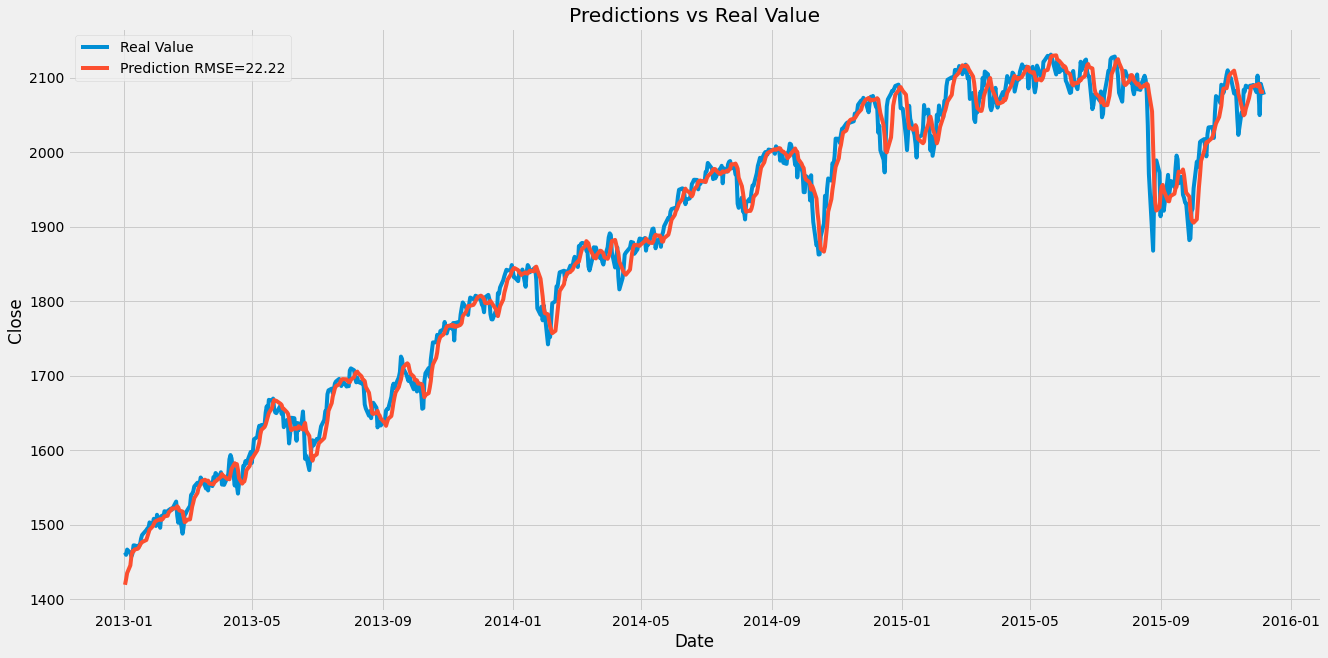

In [103]:
rmse, predictions = get_linear_regression_error(train, test, initial_indicators, 'Close')
create_line_plot(test["Date"], test["Close"], predictions, rmse)

Secondly, we will try with the columns whith high correlation to the target.

In [43]:
high_correlated_columns = ['last_5_days_mean',
 'last_30_days_mean',
 'last_365_days_mean',
 'year_of_date',
 'std_close_5',
 'std_close_365',
 'past_year_highest_price',
 'past_year_lowest_price']

Score:  0.99


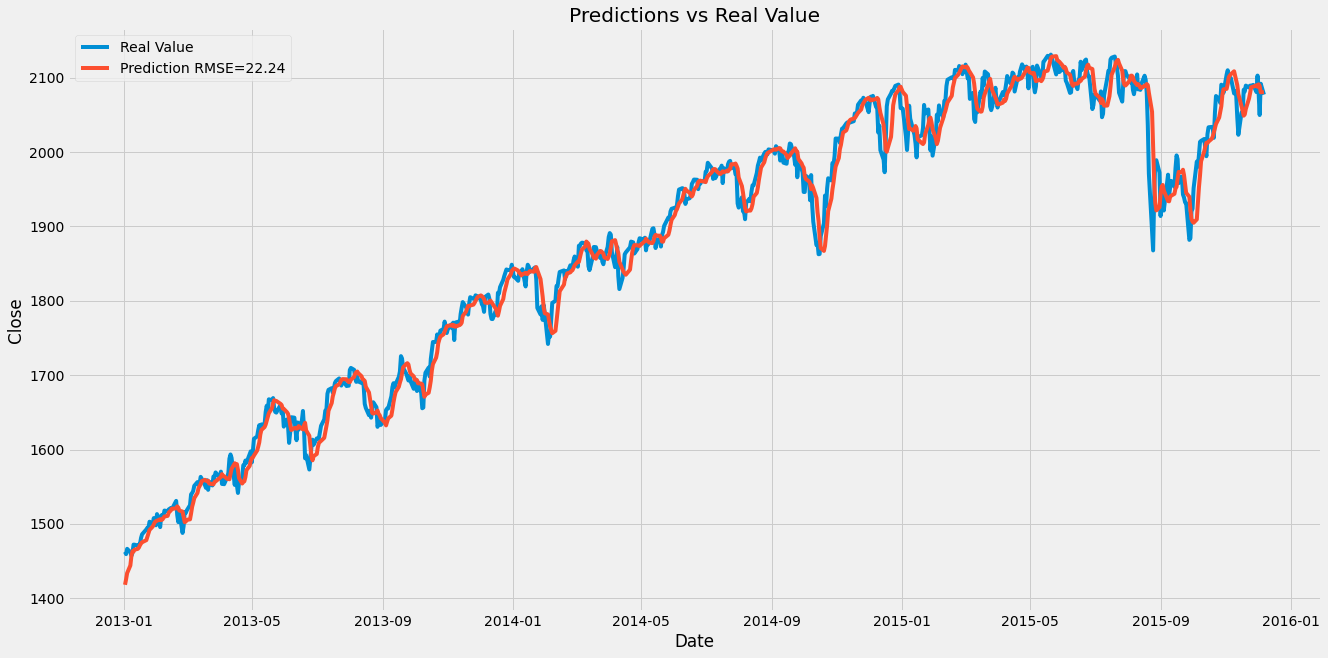

In [105]:
rmse, predictions = get_linear_regression_error(train, test, high_correlated_columns, 'Close')
create_line_plot(test["Date"], test["Close"], predictions, rmse)

Then, we will try with the columns high correlated to the target discarding the ones that may contain duplicate information

In [44]:
 high_correlated_columns_without_duplicates = ['last_5_days_mean',
 'last_30_days_mean',
 'year_of_date',
 'std_close_5',
 'std_close_365', 
 'past_year_lowest_price']

Score:  0.99


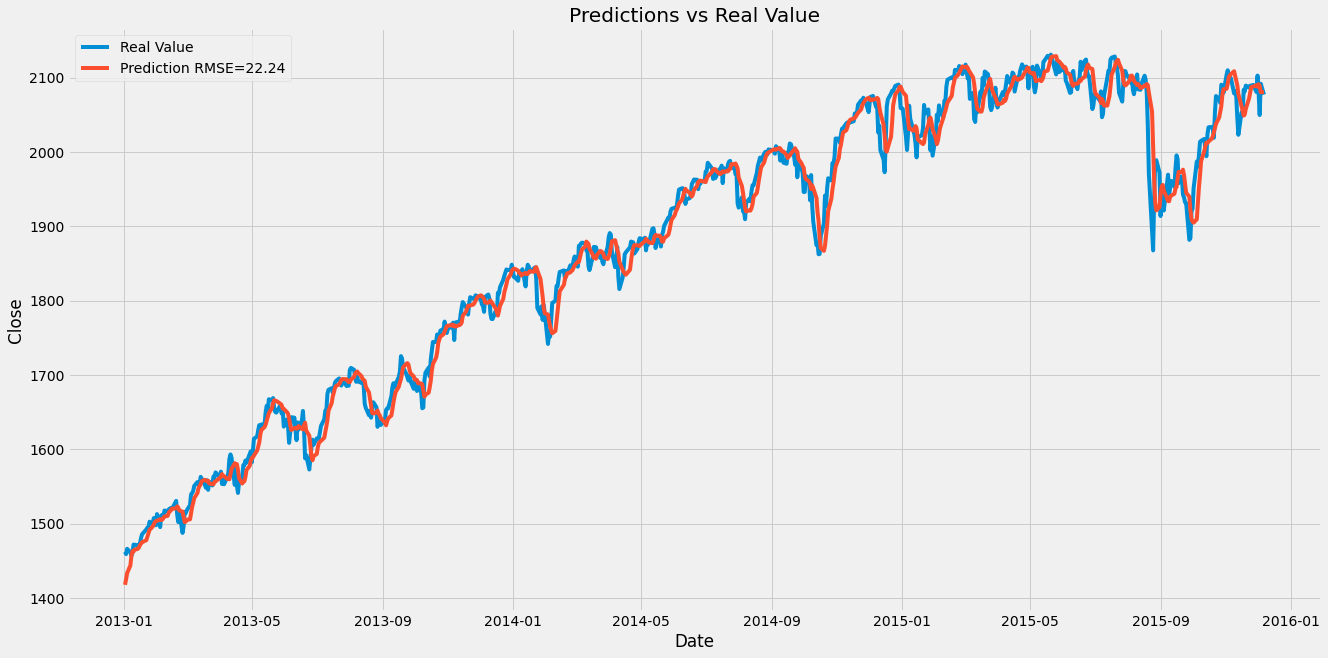

In [107]:
rmse, predictions = get_linear_regression_error(train, test, high_correlated_columns_without_duplicates, 'Close')
create_line_plot(test["Date"], test["Close"], predictions, rmse)

As we can se from the previous charts, the **RMSE** doesn't change after generating new indicators and removing duplicate information.

## Elastic Net

In this section we will try the **ElasticNet** algorithm with the previous features and options.

Score:  0.99


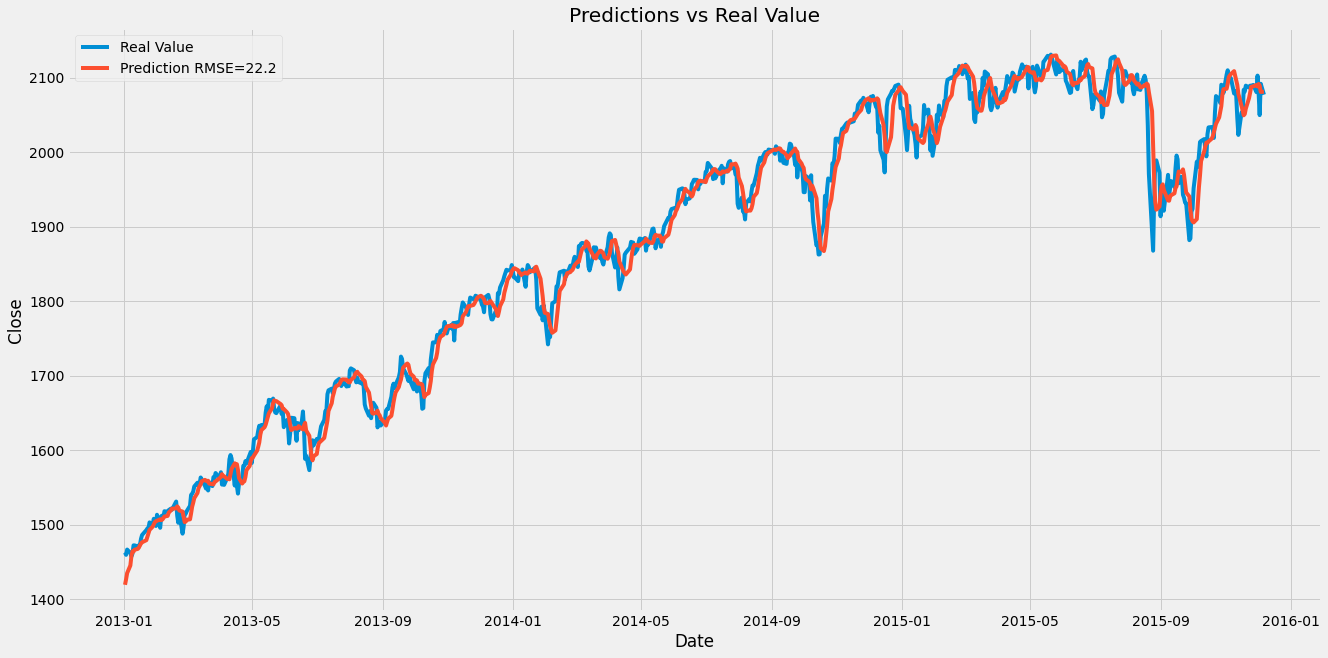

In [108]:
rmse, predictions = get_elastic_net_error(train, test, initial_indicators, 'Close', max_iter=5000)
create_line_plot(test["Date"], test["Close"], predictions, rmse,)

Score:  0.99


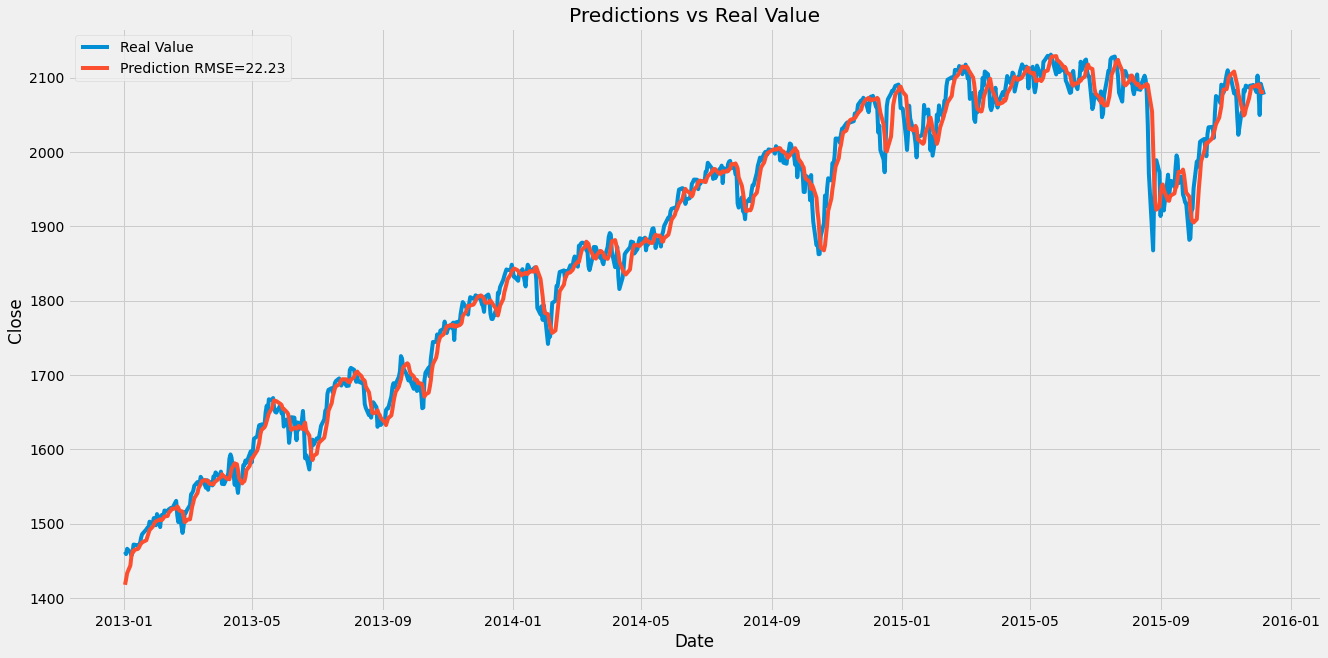

In [109]:
rmse, predictions = get_elastic_net_error(train, test, high_correlated_columns, 'Close', max_iter=5000)
create_line_plot(test["Date"], test["Close"], predictions, rmse,)

Score:  0.99


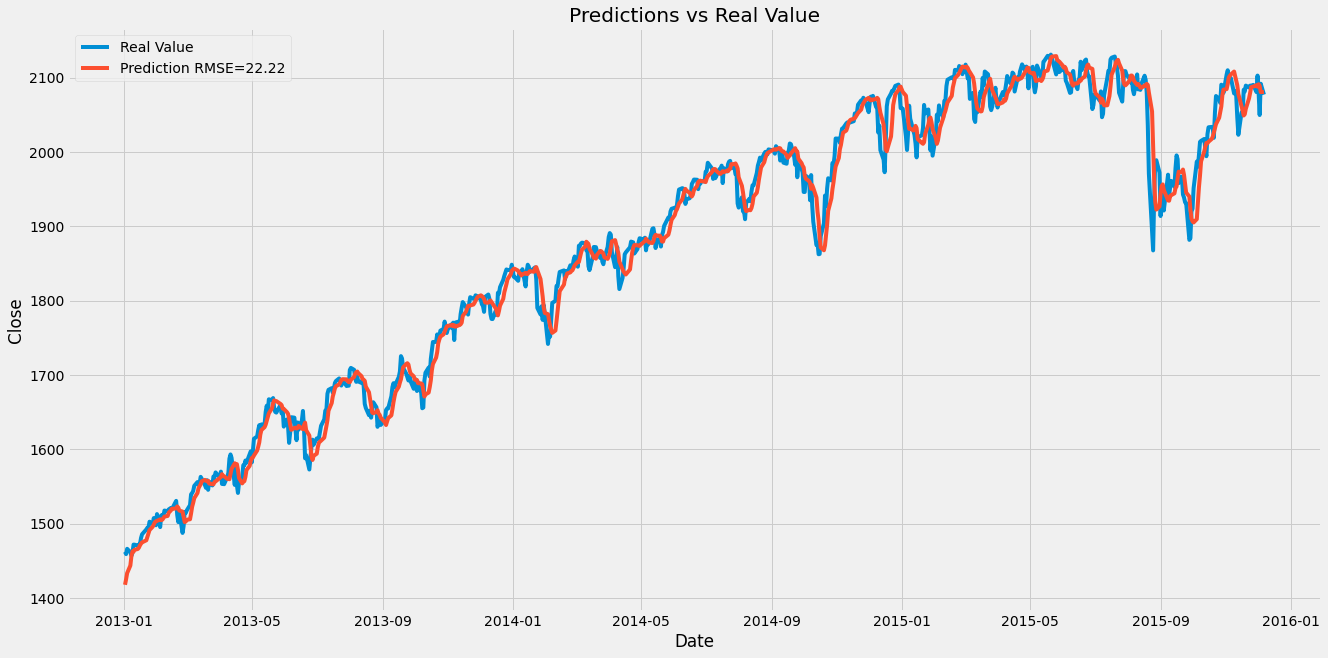

In [110]:
rmse, predictions = get_elastic_net_error(train, test, high_correlated_columns_without_duplicates, 'Close', max_iter=5000)
create_line_plot(test["Date"], test["Close"], predictions, rmse,)

As we can see for this algorithm like in the **Linear Regression** the obtained **RMSE** doesn't vary.

## Random Forest Regressor 

Score:  -3.37


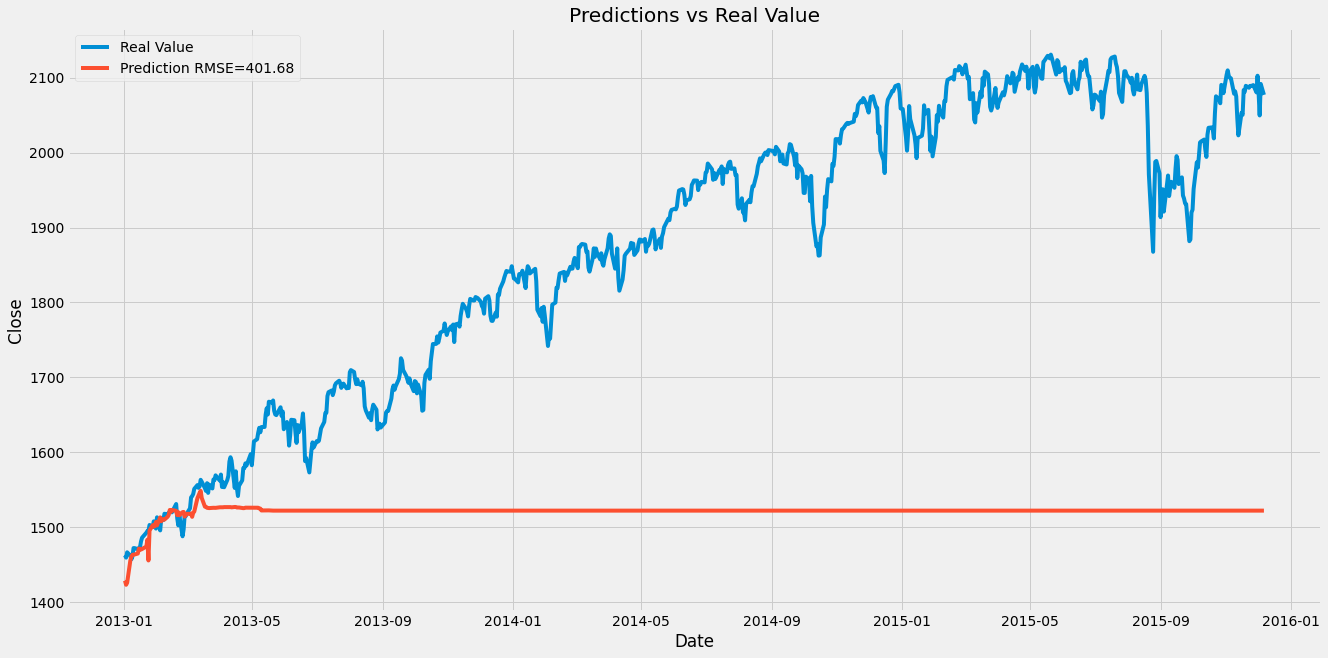

In [113]:
rmse, predictions = get_random_forest_regressor_error(train, test, initial_indicators, 'Close', max_iter=5000)
create_line_plot(test["Date"], test["Close"], predictions, rmse,)

Score:  -3.36


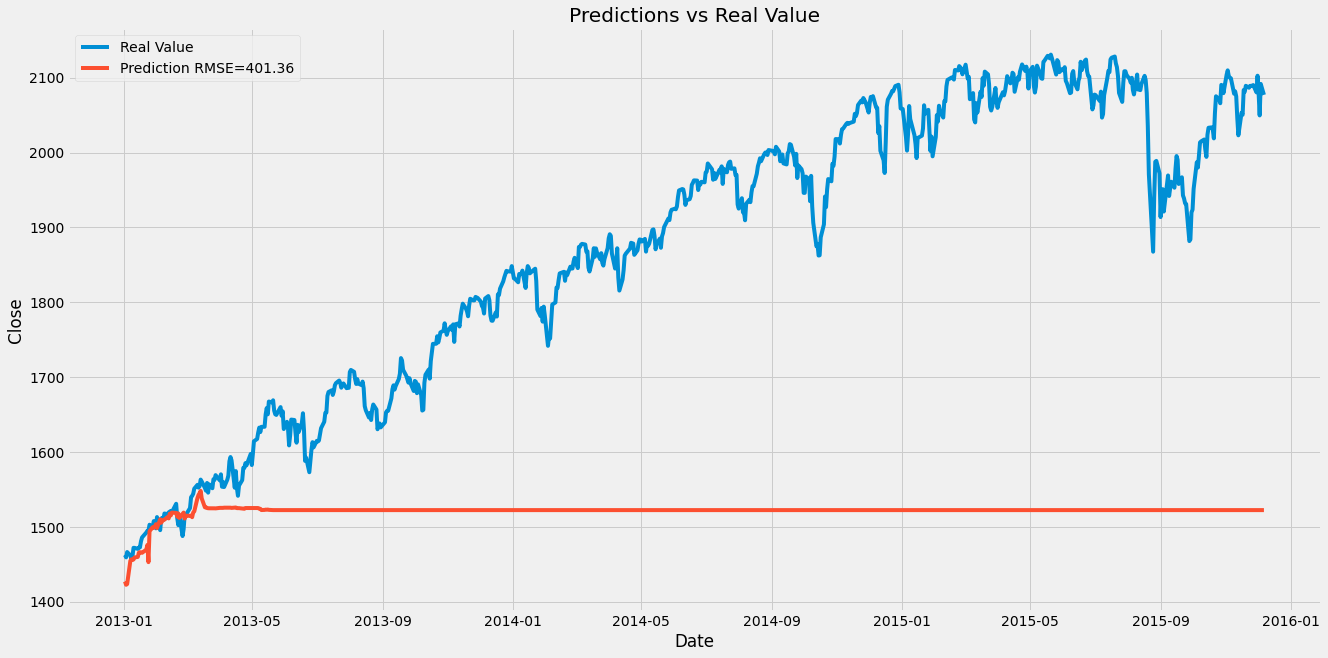

In [114]:
rmse, predictions = get_random_forest_regressor_error(train, test, high_correlated_columns, 'Close', max_iter=5000)
create_line_plot(test["Date"], test["Close"], predictions, rmse,)

Score:  -3.37


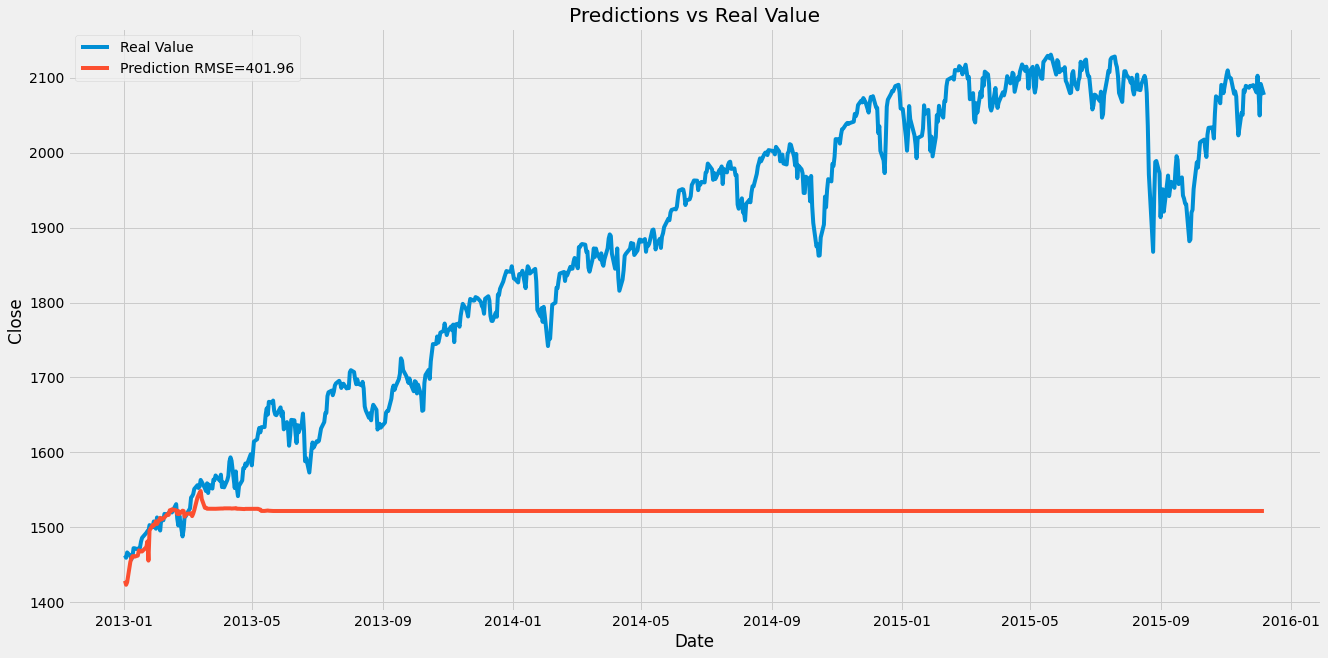

In [115]:
rmse, predictions = get_random_forest_regressor_error(train, test, high_correlated_columns_without_duplicates, 'Close', max_iter=5000)
create_line_plot(test["Date"], test["Close"], predictions, rmse,)

For the **Random Forest Regressor** the obtained RMSE is very high 401.

## One day ahead predictions

As we are not seeing considerable improvements after creating new indicators with feature engineering and we are working with a low number of features we considered to change the strategy to a more real one,  by making predictions only one day ahead.

For example, train a model using data from 1951-01-03 to 2013-01-02, make predictions for 2013-01-03, and then train another model using data from 1951-01-03 to 2013-01-03, make predictions for 2013-01-04, and so on. 

In [40]:
LINEAR_REGRESSION_MODEL = "LinearRegression"
ELASTIC_NET_MODEL = "ElasticNet"
RANDOM_FOREST_MODEL = "RandomForest"

def daily_predictor(df, features, row, target, preds, model=LINEAR_REGRESSION_MODEL, max_iter=1000):
    train = df[df["Date"]<row["Date"]]
    test = df[df["Date"]==row["Date"]]
    
    if len(train)==0:
        preds.append(np.nan)
        return np.nan
    else:
        
        if model == LINEAR_REGRESSION_MODEL:
            model = LinearRegression()
        elif model == ELASTIC_NET_MODEL:
            model = ElasticNet(random_state=0, max_iter=max_iter)
        elif model == RANDOM_FOREST_MODEL:
            model = RandomForestRegressor(random_state=0)
    
        #Train
        model.fit(train[features], train[target])

        #Test
        predictions = model.predict(test[features])
        

        #Error
        mse = mean_squared_error(test[target], predictions)
        rmse = np.sqrt(mse)    
        preds.append(predictions[0])
        return rmse

In [56]:
def one_day_predictor(df, features, date, target, model=LINEAR_REGRESSION_MODEL):
    train = df[df["Date"]<date]
    test = df[df["Date"]==date]
    
    if len(train)==0:
        preds.append(np.nan)
        return np.nan
    else:
        
        if model == LINEAR_REGRESSION_MODEL:
            model = LinearRegression()
        elif model == ELASTIC_NET_MODEL:
            model = ElasticNet(random_state=0, max_iter=max_iter)
        elif model == RANDOM_FOREST_MODEL:
            model = RandomForestRegressor(random_state=0)
    
        #Train
        model.fit(train[features], train[target])

        #Test
        predictions = model.predict(test[features])
        

        #Error
        mse = mean_squared_error(test[target], predictions)
        rmse = np.sqrt(mse)    
        #preds.append(predictions[0])
        return rmse, predictions[0]
    
    

#### Linear Regression one day ahead

In [70]:
predictions = []
rmse = df_updated.apply(lambda row: daily_predictor(df_updated, 
                                                    high_correlated_columns_without_duplicates,
                                                    row,
                                                    'Close', 
                                                    predictions,
                                                    model=LINEAR_REGRESSION_MODEL
                                                    ), axis=1)

We want to overview the RMSE value for the test dataset predicted one day ahead, that's why we will keep only the last **739** values which are the entries between **2013-01-02** and **2015-12-07** also we will compute the **mean RMSE** of all the RMSE obtained.

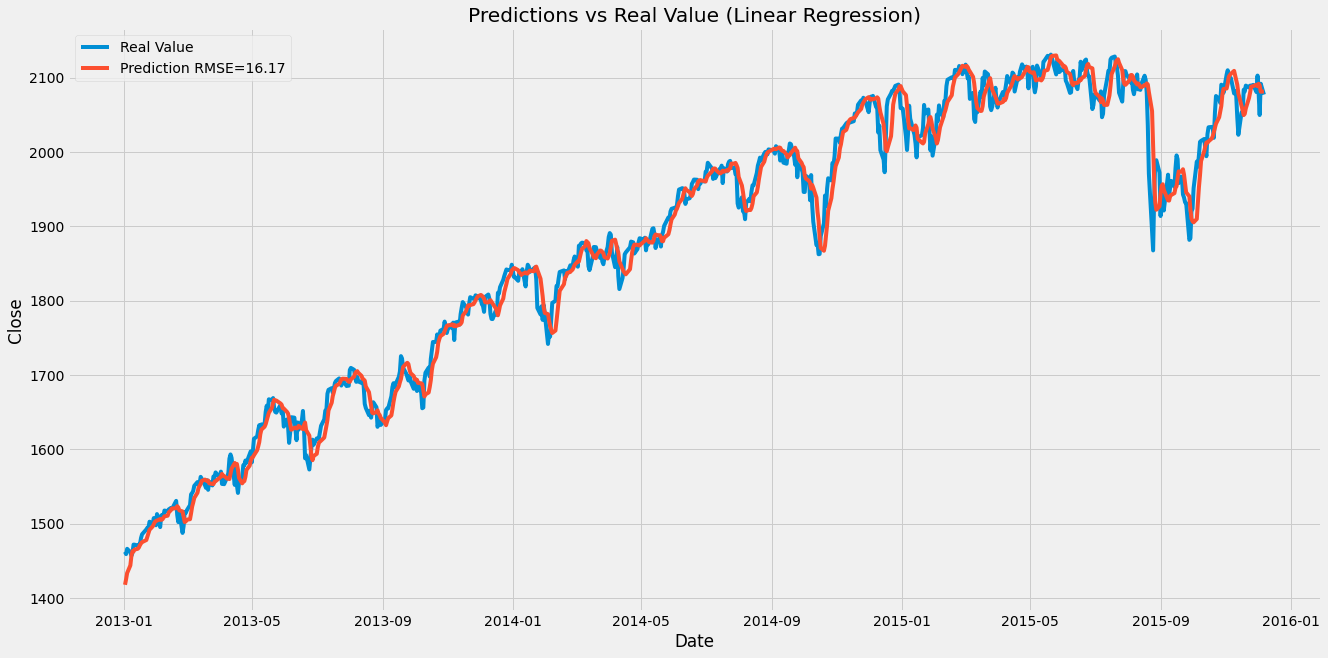

In [71]:
create_line_plot(test["Date"], 
                 test["Close"], 
                 predictions[-739:], 
                 np.mean(rmse[-739:]), 
                 algorithm_title=' (Linear Regression)')

As we can see from the previous chart, the **RMSE=16.17** decreased from **22.2** for the Logistic Regression algorithm by changing the strategy and predicting each value one day ahead.

#### Elastic Net one day ahead

In [87]:
predictions = []
e_rmse = df_updated.apply(lambda row: daily_predictor(df_updated, 
                                                    high_correlated_columns_without_duplicates,
                                                    row,
                                                    'Close', 
                                                    predictions,
                                                    model=ELASTIC_NET_MODEL,
                                                    max_iter=1000
                                                    ), axis=1)

/home/radu/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(
/home/radu/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 329.6601076863376, tolerance: 329.3231416510301
  model = cd_fast.enet_coordinate_descent(
/home/radu/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 330.0935436277209, tolerance: 329.4615463647044
  model = cd_fast.enet_coordinate_descent(
/home/radu/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did

In [90]:
predictions

[nan,
 25.620001000000002,
 25.962088087482854,
 26.10992192706145,
 25.842294302086657,
 25.828526377507842,
 26.000182703137398,
 26.093786004930735,
 26.220291405457715,
 26.062402079342064,
 25.987070666956015,
 26.10923794656992,
 26.216414526104927,
 26.234407529234886,
 26.23953914642334,
 26.256630063056946,
 26.317509448467803,
 26.42035226550423,
 26.470515944383642,
 26.54159164428711,
 26.59819793701172,
 26.5849609375,
 26.64007568359375,
 26.5943603515625,
 25.0,
 25.69580078125,
 25.75299072265625,
 25.8250732421875,
 25.874267578125,
 25.8582763671875,
 25.860916137695312,
 25.94677734375,
 25.983736725494623,
 26.020751953125,
 26.03515625,
 26.0224609375,
 26.0,
 26.0498046875,
 26.1142578125,
 26.264892578125,
 26.463134765625,
 26.617919921875,
 26.63232421875,
 26.48345947265625,
 26.52215576171875,
 26.220458984375,
 25.9949951171875,
 25.82080078125,
 25.730093197809353,
 25.588134765625,
 25.506622314453125,
 25.44866943359375,
 25.432861328125,
 25.428619384765

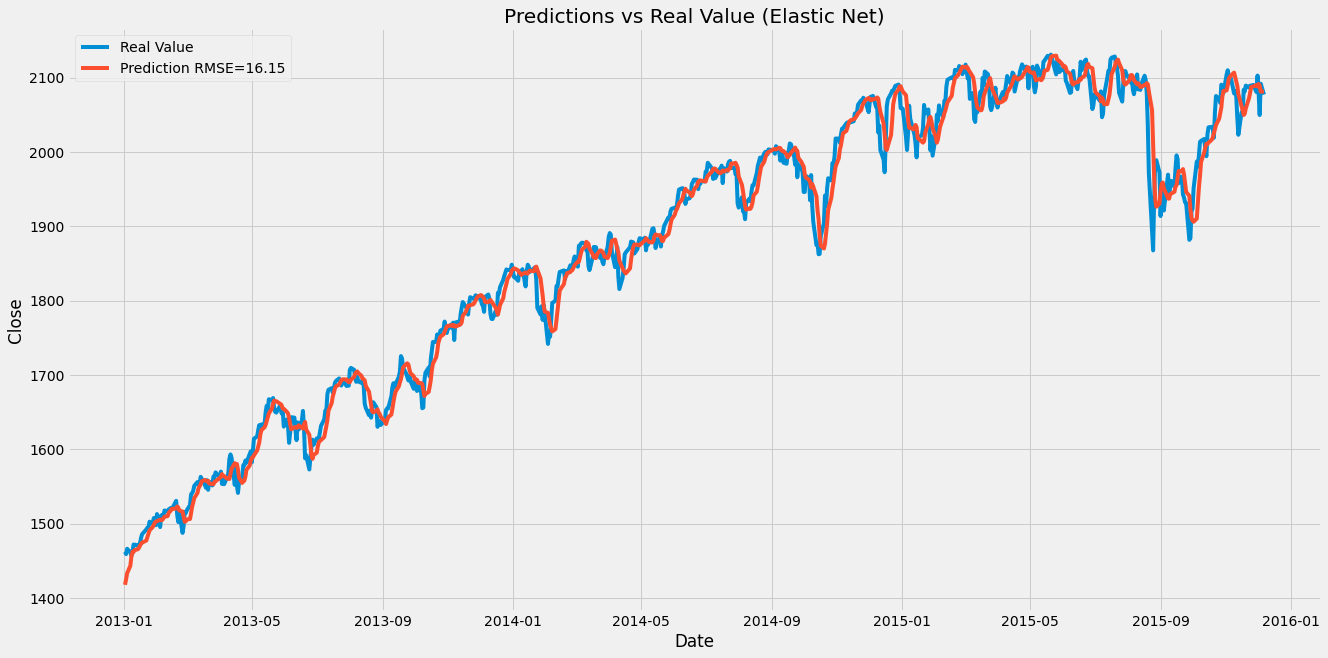

In [91]:
create_line_plot(test["Date"], 
                 test["Close"], 
                 predictions[-739:], 
                 np.mean(e_rmse[-739:]), 
                 algorithm_title=' (Elastic Net)')

As we can see from the previous chart, the **RMSE=16.15** decreased from 22.2 for the Elastic Net algorithm by changing the strategy and predicting each value one day ahead. 

Also, the value obtained is lower but very close to the Logistc Regression model, in this case we think that Elastic Net could obtain better results by modifiying the maximum number of iterations and make the model converge, the major drawback is the resources that will be necessary and the fitting time.

#### Random Forest Regressor one day ahead

In [60]:
r_rmse = []
predictions = []
for date in df_updated["Date"].tolist()[-739:]:
    print(date)
    rmse, prediction = one_day_predictor(df_updated, 
                                         high_correlated_columns_without_duplicates, 
                                         date, 
                                         'Close',                                          
                                         model=RANDOM_FOREST_MODEL)
    r_rmse.append(rmse)
    predictions.append(prediction)        

2013-01-02 00:00:00
2013-01-03 00:00:00
2013-01-04 00:00:00
2013-01-07 00:00:00
2013-01-08 00:00:00
2013-01-09 00:00:00
2013-01-10 00:00:00
2013-01-11 00:00:00
2013-01-14 00:00:00
2013-01-15 00:00:00
2013-01-16 00:00:00
2013-01-17 00:00:00
2013-01-18 00:00:00
2013-01-22 00:00:00
2013-01-23 00:00:00
2013-01-24 00:00:00
2013-01-25 00:00:00
2013-01-28 00:00:00
2013-01-29 00:00:00
2013-01-30 00:00:00
2013-01-31 00:00:00
2013-02-01 00:00:00
2013-02-04 00:00:00
2013-02-05 00:00:00
2013-02-06 00:00:00
2013-02-07 00:00:00
2013-02-08 00:00:00
2013-02-11 00:00:00
2013-02-12 00:00:00
2013-02-13 00:00:00
2013-02-14 00:00:00
2013-02-15 00:00:00
2013-02-19 00:00:00
2013-02-20 00:00:00
2013-02-21 00:00:00
2013-02-22 00:00:00
2013-02-25 00:00:00
2013-02-26 00:00:00
2013-02-27 00:00:00
2013-02-28 00:00:00
2013-03-01 00:00:00
2013-03-04 00:00:00
2013-03-05 00:00:00
2013-03-06 00:00:00
2013-03-07 00:00:00
2013-03-08 00:00:00
2013-03-11 00:00:00
2013-03-12 00:00:00
2013-03-13 00:00:00
2013-03-14 00:00:00


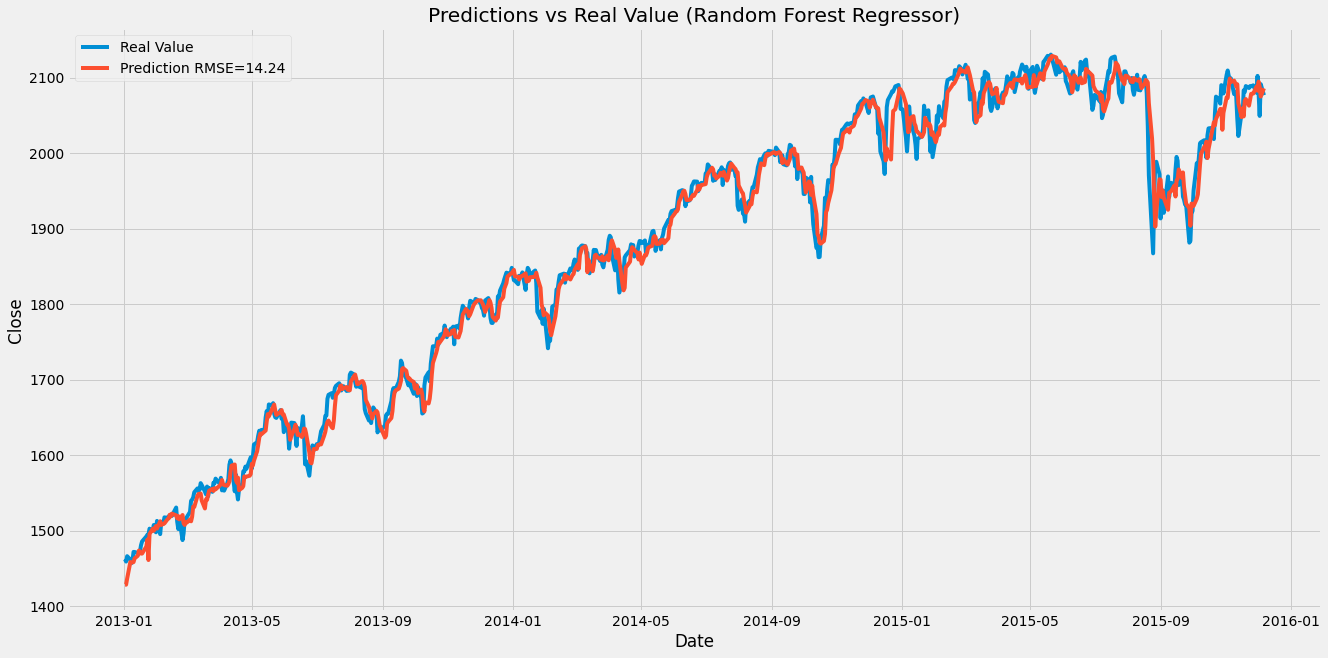

In [65]:
create_line_plot(test["Date"], 
                 test["Close"], 
                 predictions, 
                 np.mean(r_rmse), 
                 algorithm_title=' (Random Forest Regressor)')

As we can see in the previous chart, the **Random Forest Regressor** obtained a lower average **RMSE=14.24** by predicting one day ahead.

# Conclusions

First, after doing an exploratory analysis different **indicators/features** were created from the initial dataset.

Second, the correlation between all the columns and the target was computed, a threshold of **0.85** was established discarding all the columns low correlated to the target feature. Then, all the columns correlations were computed in section **6.1.6** seeing all the high correlated columns, some columns that may contain duplicate information were discarded. 

The first implemented strategy used the original dataset containing the daily record of the price **S&P500** Index from **1950** to **2015**, split it into train and test sets being the test set all the records from **2013** until **2016**. And the following regressions algorithms were applied, using the **RMSE** as a metric.

<ul>
<li><b>Logistic Regression -- </b> RMSE=22.24</li>
<li><b>Elastic Net -- </b>  RMSE=22.22</li>
<li><b>Random Forest Regressor -- </b> RMSE=401.36</li>
</ul>

After overviewing the results, to achieve a lower RMSE, a new strategy for each model was applied, instead of using an established proportion between the train and test datasets, we implemented different models predicting just one day ahead starting from **2013** until **2016** in a more realistic way. The obtained results are as follows:

<ul>
<li><b>Logistic Regression -- </b> RMSE=16.17</li>
<li><b>Elastic Net -- </b>  RMSE=16.15</li>
<li><b>Random Forest Regressor -- </b> RMSE=14.24</li>
</ul>

The lowest **RMSE=14.24** was obtained by using the Random Forest Regressor algorithm, we conclude that this improvement was caused by the increase of data in the training set. In further steps with aim of improving these results, additional features will be included as well as more registers, not only the daily price record.

